In [32]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [33]:
def symbol_to_path(symbol,base_dir="data"):
    #return path to cvs
    return os.path.join(base_dir,"{}.csv".format(str(symbol)))

In [34]:
def get_data(symbols,dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: #add SPY for referanece
        symbols.insert(0,'SPY')
    
    for symbol in symbols:
        tmp_df = pd.read_csv(symbol_to_path(symbol),
                            usecols=['Date','Adj Close'],
                            na_values=['nan'],
                            index_col="Date",parse_dates=True)
        tmp_df = tmp_df.rename(columns={'Adj Close': symbol})
        df = df.join(tmp_df)
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df

In [35]:
def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

In [36]:
def plot_selected(df,columns,start_index,end_index):
    #given the start and end dates, plot the relevant info
    plot_data(df.ix[start_index:end_index,columns], title="Selected Data")

In [37]:
def normalize_data(df):
    return df / df.ix[0,:]

In [38]:
def compute_daily_returns(df):
    daily_returns = (df / df.shift(1)) - 1
    daily_returns.ix[0,:] = 0
    return daily_returns

In [39]:
def get_bollinger_bands(rm,rstd):
    upper_band = 2*rstd+rm
    lower_band = -2*rstd+rm
    return upper_band, lower_band

In [40]:
def get_rolling_std(values,window):
    return pd.rolling_std(values,window=window)

In [41]:
def get_rolling_mean(values,window):
    return pd.rolling_mean(values,window=window)

In [42]:
def fill_missing_values(df_data):
    df_data.fillna(method='ffill', inplace=True)
    df_data.fillna(method='bfill', inplace=True)

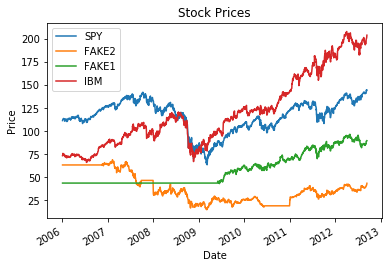

In [43]:
if __name__ == '__main__':
    symbollist=['FAKE2', 'FAKE1', 'IBM']
    start_date = '2005-12-31'
    end_date = '2014-12-31'
    
    idx = pd.date_range(start_date,end_date)
    
    df_data=get_data(symbollist,idx)
    fill_missing_values(df_data)
    plot_data(df_data)